# Exploratory Notebook

In [1]:
import pandas as pd
import sqlite3 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import ast

## Business Question
1. What are the currrent trends by genres in the Box Office
   What genres perform best? - 
2. What budget ranges for movies are the most profitable -  to avoid spending too much, and increase ROI
3. Which actors and directors/ pull in more audiences
4. What are the average lengths of films that perform well
5. 

# 🎬 Exploratory Data Analysis (EDA): Box Office Movie Insights

## 📌 Objective
Our goal is to explore what types of films are currently performing best at the box office, in order to guide our company’s new movie studio toward data-driven content creation.

---

## 1. 🗂️ Data Overview

- Load the dataset
- Preview the first few rows
- Check shape, column names, and data types
- Identify missing values and duplicates

```python
df.shape
df.columns
df.info()
df.head()
df.isnull().sum()
df.duplicated().sum()

> I will start workin the two data sets that i have already and pick relevant data within that i can start my analysis with 

### BOM Dataset EDA
Lets us start by first having a look into the Box Office Movies Dataset and see what it looks like. 


In [3]:
df1 = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
df1.info(), df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


(None,
                                          title studio  domestic_gross  \
 0                                  Toy Story 3     BV     415000000.0   
 1                   Alice in Wonderland (2010)     BV     334200000.0   
 2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
 3                                    Inception     WB     292600000.0   
 4                          Shrek Forever After   P/DW     238700000.0   
 
   foreign_gross  year  
 0     652000000  2010  
 1     691300000  2010  
 2     664300000  2010  
 3     535700000  2010  
 4     513900000  2010  )

In [4]:
# looking into df1
print(df1.info())
print("Shape of the dataset")
print(df1.shape)
print()
print("The columns on the dataset:\n", df1.columns)
print()
print("The sum of missing values", df1.isnull().sum())
print()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None
Shape of the dataset
(3387, 5)

The columns on the dataset:
 Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

The sum of missing values title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64



In [5]:
df1.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


###  Data Cleaning: Box Office Movies (BOM)

Before analysis, we first explore and clean the dataset to ensure it's ready for univariate, bivariate, and multivariate analyses.

---

####  Missing Values Summary

| Column          | Missing Values |
|-----------------|----------------|
| `title`         | 0              |
| `studio`        | 5              |
| `domestic_gross`| 28             |
| `foreign_gross` | 1350           |
| `year`          | 0              |

---
#### Cleaning Steps

- `studio`: Fill missing values with `"Unknown"`  
- `domestic_gross`: Drop rows with missing values (only 28 rows)  
- `foreign_gross`: Convert from string to numeric (remove commas), then handle missing as needed  
- Add new columns:
  - `worldwide_gross` = domestic + foreign
  - `proportion_foreign` = foreign / worldwide
- Drop duplicates if any

---


In [125]:
df1['title']

0                                       Toy Story 3
1                        Alice in Wonderland (2010)
2       Harry Potter and the Deathly Hallows Part 1
3                                         Inception
4                               Shrek Forever After
                           ...                     
3382                                      The Quake
3383                    Edward II (2018 re-release)
3384                                       El Pacto
3385                                       The Swan
3386                              An Actor Prepares
Name: title, Length: 3387, dtype: object

### 🎬 IMDB Database Analysis

We have an ERD (Entity Relationship Diagram) that shows the schema of our IMDB movie database. This gives us a bird’s eye view of how the data tables are related, helping us make sense of what we are working with and which parts of the database will be most useful in answering business questions.

Below is the ERD for the IMDB dataset:

![IMDB ERD Diagram](movie_data_erd.jpeg)  <!-- Adjust the path as needed -->

---

### 🧭 Next Steps for Analysis

We will follow a structured process to explore and extract value from the database:

#### 🔍 1. **Explore the Tables**
- Load all tables into Pandas DataFrames
- Inspect the shape, columns, and sample data from each

#### 🧹 2. **Clean the Data**
- Handle missing values
- Standardize data types (e.g., dates, numeric fields)
- Remove duplicates
- Engineer new features where helpful (e.g., gross revenue, genre flags)

#### 🧱 3. **Understand Relationships**
- Identify primary and foreign keys
- Decide which joins will allow us to combine useful information (e.g., `movie_basics` + `movie_ratings`)

#### 📊 4. **Perform EDA**
- Univariate: Analyze individual features like genres, years, ratings
- Bivariate: Study relationships like genre vs rating, year vs vote count
- Multivariate: Combine features to reveal deeper patterns (e.g., genre + year + rating)

#### 📈 5. **Visualize Insights**
- Use bar plots, histograms, heatmaps, and scatter plots
- Highlight patterns and trends that are directly relevant to decision-making

#### 🧠 6. **Make Business Recommendations**
- Based on data, suggest what kind of content the company should invest in
- Consider genre performance, ideal release years, director patterns, etc.

---

Let’s begin by exploring and loading all tables from the database!


In [7]:
# opening im.db file 

conn = sqlite3.connect('im.db')
cursor = conn.cursor()

cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
tables

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [8]:
# Loading movie_basics
q1 = """
SELECT * 
FROM movie_basics
"""
df_movie_basics = pd.read_sql(q1, conn)
df_movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [9]:
# viewing into the movie_basics dataFrame
df_movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [10]:
# Loading the directors tables
q2 = """
SELECT * 
FROM persons
"""
df_directors = pd.read_sql(q2, conn)
df_directors.info(), df_directors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   person_id           606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
dtypes: float64(2), object(3)
memory usage: 23.1+ MB


(None,
    person_id       primary_name  birth_year  death_year  \
 0  nm0061671  Mary Ellen Bauder         NaN         NaN   
 1  nm0061865       Joseph Bauer         NaN         NaN   
 2  nm0062070         Bruce Baum         NaN         NaN   
 3  nm0062195       Axel Baumann         NaN         NaN   
 4  nm0062798        Pete Baxter         NaN         NaN   
 
                                  primary_profession  
 0         miscellaneous,production_manager,producer  
 1        composer,music_department,sound_department  
 2                        miscellaneous,actor,writer  
 3  camera_department,cinematographer,art_department  
 4  production_designer,art_department,set_decorator  )

In [30]:
df_directors.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [11]:
q3 = """
SELECT * 
FROM known_for
"""
df_4 = pd.read_sql(q3, conn)
df_4.info(), df_4.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638260 entries, 0 to 1638259
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   person_id  1638260 non-null  object
 1   movie_id   1638260 non-null  object
dtypes: object(2)
memory usage: 25.0+ MB


(None,
    person_id   movie_id
 0  nm0061671  tt0837562
 1  nm0061671  tt2398241
 2  nm0061671  tt0844471
 3  nm0061671  tt0118553
 4  nm0061865  tt0896534)

In [12]:
q4 = """
SELECT * 
FROM movie_ratings
"""
df_5 = pd.read_sql(q4, conn)
df_5.info(), df_5.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


(None,
        averagerating      numvotes
 count   73856.000000  7.385600e+04
 mean        6.332729  3.523662e+03
 std         1.474978  3.029402e+04
 min         1.000000  5.000000e+00
 25%         5.500000  1.400000e+01
 50%         6.500000  4.900000e+01
 75%         7.400000  2.820000e+02
 max        10.000000  1.841066e+06)

In [13]:
q5 = """
SELECT *
FROM movie_akas
"""

df_akas = pd.read_sql(q5, conn)

df_akas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [14]:
q6 = """
SELECT *
FROM movie_ratings
"""

df_ratings = pd.read_sql(q6, conn)

df_ratings.sample(10), df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


(         movie_id  averagerating  numvotes
 57164   tt3562846            7.6        33
 49340   tt6126294            5.9      1523
 27524   tt7620218            6.6        71
 12565   tt2156635            4.0         5
 47842   tt5108444            7.3        73
 35476   tt3007512            7.1     66595
 21538   tt2133215            5.8         6
 44771   tt2402105            6.2     24557
 8109    tt4610754            5.2         6
 2251   tt10215026            6.5        31,
 None)

In [15]:
# principals table 
q7 = """
SELECT *
FROM principals
"""

df_principals = pd.read_sql(q7, conn)

df_principals.sample(10), df_principals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   movie_id    1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   person_id   1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


(          movie_id  ordering  person_id  category       job  \
 527811   tt2528472         8  nm5383628  composer      None   
 409450   tt4079944         4  nm1323745   actress      None   
 1016791  tt8309876         2  nm9103287   actress      None   
 446010   tt3430498         6  nm0687867  producer  producer   
 238415   tt1645867         3  nm3893470   actress      None   
 456555   tt4164966         2  nm6883724  producer  producer   
 451542   tt4010822         1  nm2363399   actress      None   
 740537   tt5996652         3  nm8288407   actress      None   
 883477   tt9698056         7  nm5032680     actor      None   
 591976   tt5826372         2  nm8234550     actor      None   
 
                        characters  
 527811                       None  
 409450               ["Basienka"]  
 1016791                      None  
 446010                       None  
 238415                  ["Kathy"]  
 456555                       None  
 451542            ["Robin Banks"] 

**tnm.movie_budgets**

In [16]:
# Open tn_movie_budgets
df_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
df_budgets.head(), df_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


(   id  release_date                                        movie  \
 0   1  Dec 18, 2009                                       Avatar   
 1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
 2   3   Jun 7, 2019                                 Dark Phoenix   
 3   4   May 1, 2015                      Avengers: Age of Ultron   
 4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   
 
   production_budget domestic_gross worldwide_gross  
 0      $425,000,000   $760,507,625  $2,776,345,279  
 1      $410,600,000   $241,063,875  $1,045,663,875  
 2      $350,000,000    $42,762,350    $149,762,350  
 3      $330,600,000   $459,005,868  $1,403,013,963  
 4      $317,000,000   $620,181,382  $1,316,721,747  ,
 None)

In [17]:
df_budgets.sample(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
609,10,"Feb 10, 2012",Journey 2: The Mysterious Island,"$79,000,000","$103,860,290","$318,146,162"
964,65,"Apr 4, 2008",Leatherheads,"$58,000,000","$31,373,938","$41,348,628"
539,40,"May 21, 1996",Mission: Impossible,"$80,000,000","$180,981,886","$457,697,994"
4415,16,"May 23, 1973",Pat Garrett and Billy the Kid,"$4,638,783","$8,000,000","$11,000,000"
4034,35,"Sep 28, 1990",Dark Angel,"$7,000,000","$4,372,561","$4,372,561"
5103,4,"Oct 9, 2009",Trucker,"$1,500,000","$52,429","$52,429"
576,77,"Dec 31, 1999",Fantasia 2000 (Theatrical Release),"$80,000,000","$69,610,858","$69,618,634"
1202,3,"Jan 23, 2009",Outlander,"$50,000,000","$166,003","$1,250,617"
129,30,"Mar 26, 2010",How to Train Your Dragon,"$165,000,000","$217,581,232","$494,870,992"
205,6,"Jul 9, 2003",Pirates of the Caribbean: The Curse of the Bla...,"$140,000,000","$305,411,224","$634,954,103"


**tmdb.movies**

In [18]:
# open tmdb.movis.csv 

df= pd.read_csv('tmdb.movies.csv.gz')

df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
 10  genre_names        26517 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 2.2+ MB


## Clean the Dataset
Steps:
* Drop unnecessary columns (Unnamed: 0).
* Check and handle missing values.
* Check rows where vote_count is zero or very low
* Check movies with zero popularity
* Drop movies with vote_average < 4
* Drop movies with vote_count < 100
* Reset index after dropping rows
* Display the number of remaining rows and the first few cleaned records

In [21]:
# Drop the 'Unnamed: 0' column if it exists
if "Unnamed: 0" in df.columns:
    df_cleaned = df.drop(columns=["Unnamed: 0"])
else:
    df_cleaned = df.copy() 

# Convert release_date to datetime
df_cleaned["release_date"] = pd.to_datetime(df_cleaned["release_date"], errors="coerce")

# Check for missing values
missing_values = df_cleaned.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

# Check rows where vote_count is zero or very low
low_vote_movies = df_cleaned[df_cleaned["vote_count"] < 10]
print("\nMovies with very low vote count:\n", low_vote_movies.head())

# Check movies with zero popularity
zero_popularity_movies = df_cleaned[df_cleaned["popularity"] == 0]
print("\nMovies with zero popularity:\n", zero_popularity_movies.head())

# Drop movies with vote_average < 4
df_cleaned = df_cleaned[df_cleaned["vote_average"] >= 4]

# Drop movies with vote_count < 100
df_cleaned = df_cleaned[df_cleaned["vote_count"] >= 100]

# Reset index after dropping rows
df_cleaned = df_cleaned.reset_index(drop=True)

# Display the number of remaining rows and the first few cleaned records
print("\nShape of Cleaned Dataset (Rows, Columns):", df_cleaned.shape)
print("\nFirst 5 Rows of Cleaned Dataset:\n", df_cleaned.head())

Missing Values in Each Column:
 genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
genre_names          0
dtype: int64

Movies with very low vote count:
         genre_ids     id original_language  \
481          [18]  66111                en   
483  [27, 28, 53]  44224                en   
505   [18, 10749]  63414                te   
552      [12, 28]  45611                en   
554  [80, 18, 53]  39478                en   

                                  original_title  popularity release_date  \
481                                       Luster       4.309   2010-12-12   
483                                         Bear       4.288   2010-01-01   
505                                    డార్లింగ్       4.029   2010-04-23   
552  Jack Hunter and the Lost Treasure of Ugarit       3.471   2010-07-31   
554                         

# Visualizing the Findings
* We'll create three visualizations:

* Top 10 Most Popular Movies

* Distribution of Average Ratings

* Trend of Movie Releases Over Time

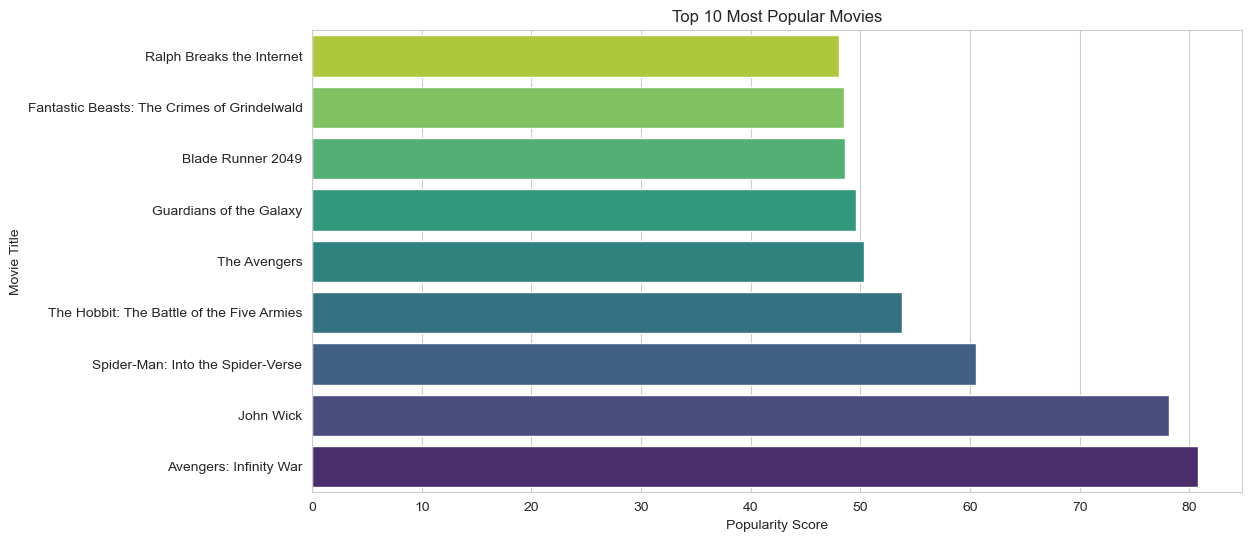

C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


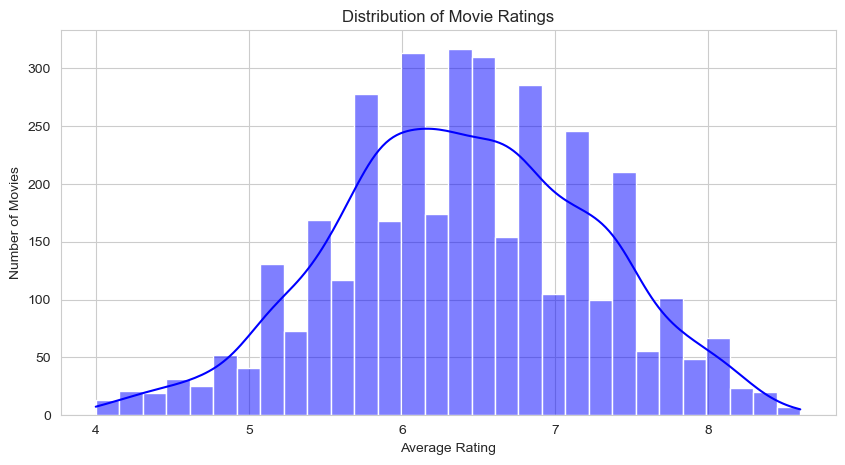

C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


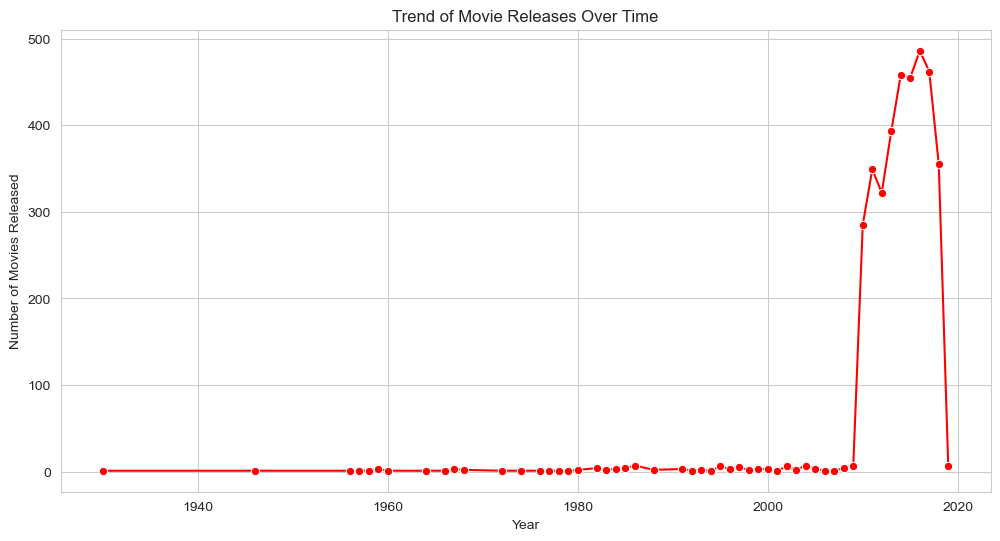

In [22]:
# Set seaborn style
sns.set_style("whitegrid")

# 1. Top 10 Most Popular Movies
top_popular_movies = df_cleaned.nlargest(10, "popularity")

plt.figure(figsize=(12, 6))
sns.barplot(y=top_popular_movies["title"], x=top_popular_movies["popularity"], palette="viridis")
plt.xlabel("Popularity Score")
plt.ylabel("Movie Title")
plt.title("Top 10 Most Popular Movies")
plt.gca().invert_yaxis()  # Invert for readability
plt.show()

# 2. Distribution of Vote Averages
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned["vote_average"], bins=30, kde=True, color="blue")
plt.xlabel("Average Rating")
plt.ylabel("Number of Movies")
plt.title("Distribution of Movie Ratings")
plt.show()

# 3. Movie Releases Over the Years
df_cleaned["release_year"] = df_cleaned["release_date"].dt.year
release_trend = df_cleaned["release_year"].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=release_trend.index, y=release_trend.values, marker="o", color="red")
plt.xlabel("Year")
plt.ylabel("Number of Movies Released")
plt.title("Trend of Movie Releases Over Time")
plt.show()

Analysis of genre trends and audience pull to provide insights for improving business strategies. ​

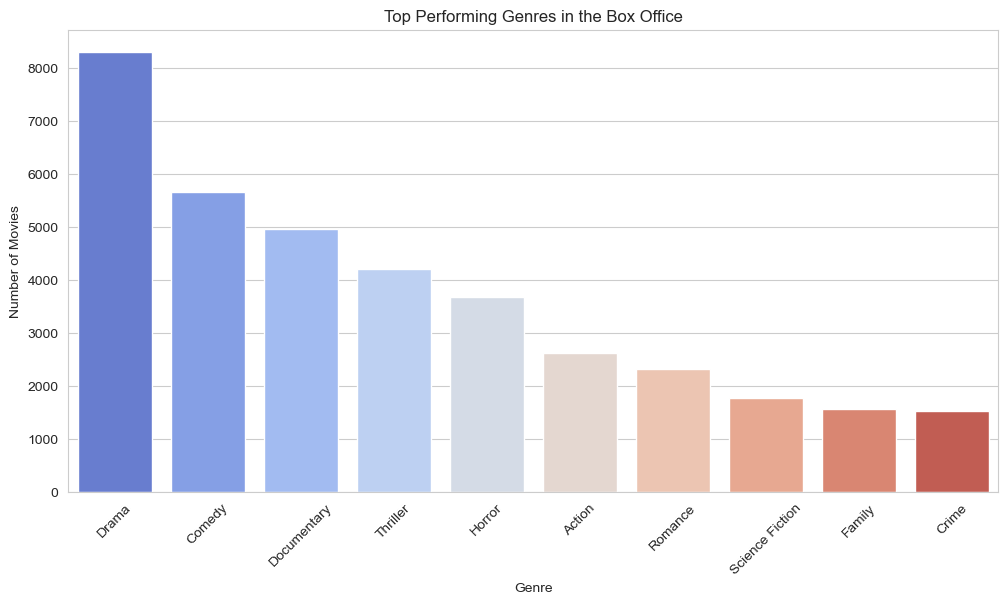

In [23]:
# Mapping genre IDs to actual names
genre_mapping = {
    28: "Action", 12: "Adventure", 16: "Animation", 35: "Comedy", 80: "Crime",
    99: "Documentary", 18: "Drama", 10751: "Family", 14: "Fantasy", 36: "History",
    27: "Horror", 10402: "Music", 9648: "Mystery", 10749: "Romance", 878: "Science Fiction",
    10770: "TV Movie", 53: "Thriller", 10752: "War", 37: "Western"
}

# Ensure genre_ids column is a string, then safely convert
def safe_eval(val):
    try:
        return ast.literal_eval(val) if isinstance(val, str) else val
    except:
        return []

df['genre_ids'] = df['genre_ids'].apply(safe_eval)

# Convert genre IDs to names
df['genre_names'] = df['genre_ids'].apply(lambda ids: [genre_mapping.get(genre, "Unknown") for genre in ids])

# Flatten the genre list
all_genres = [genre for sublist in df['genre_names'] for genre in sublist]

# Count occurrences of each genre
genre_counts = pd.Series(all_genres).value_counts()

# Plot the top 10 performing genres
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index[:10], y=genre_counts.values[:10], palette='coolwarm')
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.title("Top Performing Genres in the Box Office")
plt.xticks(rotation=45)
plt.show()

# QUESTIONS TO ANSWER
### . What Makes a Movie Popular?
* The most popular movies have very high audience interest (These successful films can guide marketing strategies and content selection to attract more viewers).
## Q1. What are the currrent trends by genres in the Box Office. What Genres Perform Best?
* Some movie genres consistently attract larger audiences.
* Focusing on popular genres in marketing and promotions can improve business performance.

## Q4. What are the average lengths of films that perform well

### What Do Ratings Tell Us?
* Most movies receive ratings between 5 and 8 (out of 10).

A well-crafted story and high production quality increase ratings, making movies more appealing.
### How Has Movie Production Changed Over Time?
* More movies are being produced each year, indicating industry growth.
* Understanding peak release periods helps in better timing for launching new content.

**rotten tomatoes**

In [66]:
# opening rotten tomatoes movie info 

df_rt_movies = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t')

df_rt_movies.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [68]:
df_rt_movies.info(), df_rt_movies.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


(None,
 id                 0
 synopsis          62
 rating             3
 genre              8
 director         199
 writer           449
 theater_date     359
 dvd_date         359
 currency        1220
 box_office      1220
 runtime           30
 studio          1066
 dtype: int64)